# Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats
from datetime import date

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Initial City List

In [2]:
# List for holding lat_lngs, cities, and countries.
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
# Creates list of lists with a length of two. Position [0] is the latitude. Position [1] is the longitude.
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = (citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name).title()
    country = (citipy.nearest_city(lat_lng[0],lat_lng[1]).country_code).upper()
    # If the city is unique, add the city name and country code to the cities list.
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
# Print the city count to confirm sufficient count.
if len(cities) == len(countries):
    print(f"Cities Length: {len(cities)}, Countries Length: {len(countries)} - Looks good!")
else:
    print(f"Cities Length: {len(cities)}, Countries Length: {len(countries)} - Something is off. Your lists aren't the same lenght!")
    
# Creates DataFrame of cities and countries.
world = pd.DataFrame()
world["City"] = cities
world["Country"] = countries

Cities Length: 581, Countries Length: 581 - Looks good!


# API Call for City Weather

In [3]:
# Base URL for OpenWeatherMaps API.
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

# Adds empty columns to world DataFrame.
world["Latitude"] = ""
world["Longitude"] = ""
world["Max Temp"] = ""
world["Humidity"] = ""
world["Cloudiness"] = ""
world["Wind Speed"] = ""
world["Date"] = ""

In [4]:
# Pre-sets counter variables.
clear = 0
exceptions = 0

# Uses df.iterrows() to iterate through the world DataFrame and pull data from OpenWeatherMaps API.
# The data is then added to premade empty columns in the world DataFrame.
for index,row in world.iterrows():
    
    # Pulls city name from DataFrame and reformats it for user readability.
    city = str(row[0])
    city_name = str(city).title()
    
    # Reformats city name to account for spaces when calling the API.
    city = city.replace(" ","%20")
    
    # API Call.
    query_url = f'{base_url}appid={weather_api_key}&q={city}&units=imperial'
    weather_json = requests.get(query_url).json()
    
    # Exception to allow cities to not be found without breaking the loop.
    try:
        
        # Pulls new values from API get request.
        world.loc[index,"Latitude"] = round(weather_json["coord"]["lat"],2)
        world.loc[index,"Longitude"] = round(weather_json["coord"]["lon"],2)
        world.loc[index,"Max Temp"] = round(weather_json["main"]["temp_max"],2)
        world.loc[index,"Humidity"] = round(weather_json["main"]["humidity"],2)
        world.loc[index,"Cloudiness"] = weather_json["clouds"]["all"]
        world.loc[index,"Wind Speed"] = round(weather_json["wind"]["speed"],2)
        world.loc[index,"Date"] = weather_json["dt"]
        
        # Prints city name and number. Increases counter for cleared successful cities.
        clear = clear + 1
        print(f"Fetching Data for City {clear}: {city_name}")
        
    # Prints a short explanation and increases the exception counter.
    except KeyError:
        print("Hmm, I couldn't find that one.")
        exceptions = exceptions + 1
        
    # Breaks prints with dashed line every ten successful cities.
    test = str(clear)
    if (test[-1]) == "0":
        print("--------------------------")
        

Hmm, I couldn't find that one.
--------------------------
Fetching Data for City 1: Sitka
Fetching Data for City 2: Ushuaia
Fetching Data for City 3: Narsaq
Fetching Data for City 4: Puerto Ayora
Fetching Data for City 5: Rokupr
Fetching Data for City 6: Albany
Fetching Data for City 7: Bluff
Fetching Data for City 8: Geraldton
Fetching Data for City 9: Hobart
Fetching Data for City 10: Bethel
--------------------------
Fetching Data for City 11: Carnarvon
Fetching Data for City 12: Nikolskoye
Fetching Data for City 13: Takoradi
Fetching Data for City 14: Jalu
Fetching Data for City 15: Ojinaga
Fetching Data for City 16: Busselton
Hmm, I couldn't find that one.
Fetching Data for City 17: Champerico
Fetching Data for City 18: Shingu
Hmm, I couldn't find that one.
Fetching Data for City 19: Port Lincoln
Fetching Data for City 20: Pierre
--------------------------
Fetching Data for City 21: Cockburn Town
Fetching Data for City 22: San Patricio
Fetching Data for City 23: Ushibuka
Hmm, I co

Fetching Data for City 195: Kutum
Fetching Data for City 196: Oranjestad
Fetching Data for City 197: Sibolga
Fetching Data for City 198: Pevek
Fetching Data for City 199: Korla
Fetching Data for City 200: Hasaki
--------------------------
Fetching Data for City 201: Isernia
Fetching Data for City 202: Jamestown
Fetching Data for City 203: Puerto Del Rosario
Fetching Data for City 204: Nantucket
Fetching Data for City 205: Berlevag
Fetching Data for City 206: Roald
Fetching Data for City 207: Ancud
Fetching Data for City 208: Mahibadhoo
Fetching Data for City 209: Siocon
Fetching Data for City 210: Mayor Pablo Lagerenza
--------------------------
Fetching Data for City 211: Broome
Hmm, I couldn't find that one.
Fetching Data for City 212: Piacabucu
Fetching Data for City 213: Brae
Fetching Data for City 214: Colares
Fetching Data for City 215: Magelang
Fetching Data for City 216: Virginia Beach
Fetching Data for City 217: Aklavik
Fetching Data for City 218: Provideniya
Fetching Data for

Fetching Data for City 385: Coos Bay
Fetching Data for City 386: Fortuna
Fetching Data for City 387: Alofi
Fetching Data for City 388: Tual
Fetching Data for City 389: Bayanday
Fetching Data for City 390: Auki
--------------------------
Hmm, I couldn't find that one.
--------------------------
Fetching Data for City 391: Bandarbeyla
Fetching Data for City 392: Rincon De La Victoria
Fetching Data for City 393: Senneterre
Fetching Data for City 394: Lagoa Santa
Fetching Data for City 395: Fukue
Fetching Data for City 396: Belaya Gora
Fetching Data for City 397: Kita
Fetching Data for City 398: Nuevo Progreso
Fetching Data for City 399: Jega
Fetching Data for City 400: Touros
--------------------------
Fetching Data for City 401: Dunmore Town
Fetching Data for City 402: General Pico
Fetching Data for City 403: Paso De Los Toros
Fetching Data for City 404: Bridgetown
Fetching Data for City 405: Pinega
Fetching Data for City 406: Plettenberg Bay
Fetching Data for City 407: Longido
Fetching 

# Basic Output and Export

In [5]:
# Prints success rate and the number of cities that couldn't be found.
print(f"Success Rate: {round(100*(clear / (clear + exceptions)),2)}% ({clear} out of {clear + exceptions})")
print(f"{exceptions} cities couldn't be found in OpenWeatherMaps API.")

Success Rate: 91.74% (533 out of 581)
48 cities couldn't be found in OpenWeatherMaps API.


In [6]:
# Exports complete city data into a CSV in directory 'CSV_Outputs'.
world.to_csv("CSV_Outputs/complete_world_data.csv")

# Basic Analysis

In [7]:
# Creates an analysis DataFrame with summary statistics for each column after dropping any empty values.
world_analysis = world
world_analysis.replace("", np.nan, inplace=True)
world_analysis.dropna(how="any", inplace=True)
world_analysis.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,19.897355,14.915047,50.483659,74.431520,53.577861,7.789325,1.612573e+09
std,32.371731,91.261765,31.685301,19.016749,41.359192,5.370862,2.742889e+02
min,-54.800000,-175.200000,-43.600000,1.000000,0.000000,0.220000,1.612573e+09
25%,-6.220000,-67.490000,32.000000,65.000000,4.000000,3.560000,1.612573e+09
50%,21.460000,20.580000,61.700000,79.000000,73.000000,6.550000,1.612573e+09
75%,45.410000,96.130000,75.540000,88.000000,98.000000,10.960000,1.612574e+09
max,78.220000,179.320000,88.050000,100.000000,100.000000,28.770000,1.612574e+09


# Removing Cities with Humidity > 100%

In [8]:
# Removes cities with humidity over 100% if any exist in the DataFrame.
filtered_humidity = world[world["Humidity"] < 100.0]
# Finds the cities that have a humidity over 100%.
max_humid = max(world["Humidity"])
if max_humid > 99.9:
    print(f"List of Indicies for Cities Over 100% Humidity: {world.index[world['Humidity'] > 99.9].tolist()}")
else:
    print(f"There are no cities with over 100% humidity. The highest humidity is {max_humid}.")

List of Indicies for Cities Over 100% Humidity: [11, 102, 177, 217, 220, 257, 291, 308, 429, 454, 461, 514, 525, 529, 551, 553]


In [9]:
# Renames DataFrame for plotting.
plot_world = filtered_humidity

# Plotting

In [10]:
# Pulls and formats today's date for adding to plot titles.
today = date.today()
todate = today.strftime("%m/%d/%y")
today_date = todate.replace("0","")

##### Latitude vs. Temperature

Text(0.5, 0, 'Latitude')

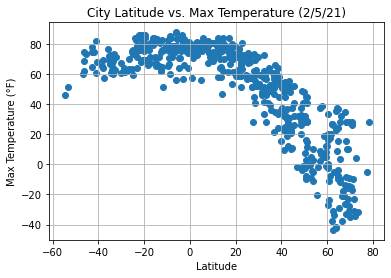

In [11]:
# Values and Initial Plot
x_values = plot_world["Latitude"]
y_values = plot_world["Max Temp"]
plt.scatter(x_values,y_values)
plt.grid(b=True)

# Labelling and Formatting
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")

##### Latitude vs. Humidity

Text(0.5, 0, 'Latitude')

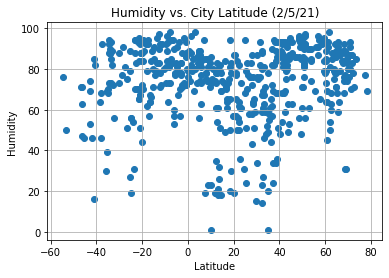

In [12]:
# Values and Initial Plot
x_values = plot_world["Latitude"]
y_values = plot_world["Humidity"]
plt.scatter(x_values,y_values)
plt.grid(b=True)

# Labelling and Formatting
plt.title(f"Humidity vs. City Latitude ({today_date})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

##### Latitude vs. Cloudiness

Text(0.5, 0, 'Latitude')

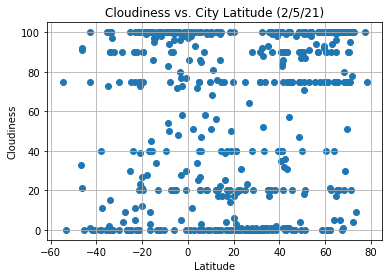

In [13]:
# Values and Initial Plot
x_values = plot_world["Latitude"]
y_values = plot_world["Cloudiness"]
plt.scatter(x_values,y_values)
plt.grid(b=True)

# Labelling and Formatting
plt.title(f"Cloudiness vs. City Latitude ({today_date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

##### Latitude vs. Wind Speed

Text(0.5, 0, 'Latitude')

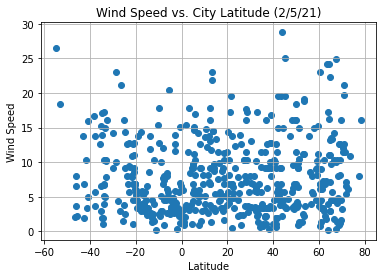

In [14]:
# Values and Initial Plot
x_values = plot_world["Latitude"]
y_values = plot_world["Wind Speed"]
plt.scatter(x_values,y_values)
plt.grid(b=True)

# Labelling and Formatting
plt.title(f"Wind Speed vs. City Latitude ({today_date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Linear Regressions

In [15]:
# Creates northern and southern hemisphere DataFrames.
northern = plot_world[plot_world["Latitude"] >= 0]
southern = plot_world[plot_world["Latitude"] < 0]

##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Value: -0.8784246352514402


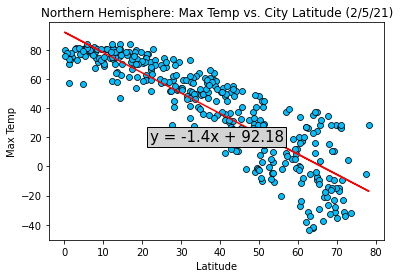

In [16]:
# Values and Initial Plot
x_values = northern["Latitude"]
y_values = northern["Max Temp"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Northern Hemisphere: Max Temp vs. City Latitude ({today_date})")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Value: 0.41641302643502504


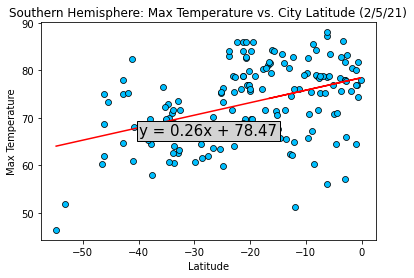

In [17]:
# Sets new value lists for x and y.
x_values = southern["Latitude"]
y_values = southern["Max Temp"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Southern Hemisphere: Max Temperature vs. City Latitude ({today_date})")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Value: 0.238406161574373


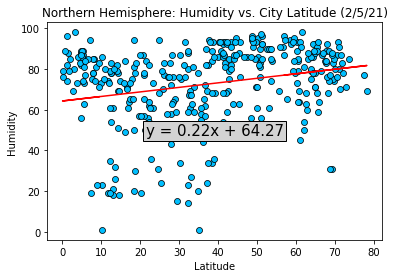

In [18]:
# Values and Initial Plot
x_values = northern["Latitude"]
y_values = northern["Humidity"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Northern Hemisphere: Humidity vs. City Latitude ({today_date})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Value: 0.3011469295649734


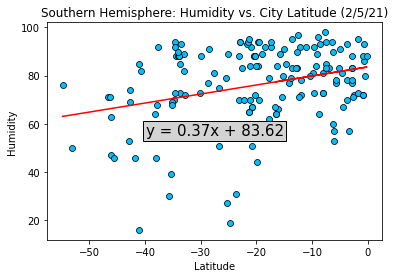

In [19]:
# Values and Initial Plot
x_values = southern["Latitude"]
y_values = southern["Humidity"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Southern Hemisphere: Humidity vs. City Latitude ({today_date})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Value: 0.31123210668468476


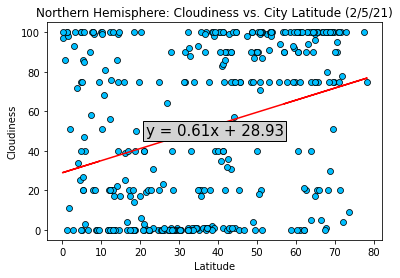

In [20]:
# Values and Initial Plot
x_values = northern["Latitude"]
y_values = northern["Cloudiness"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Northern Hemisphere: Cloudiness vs. City Latitude ({today_date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Value: 0.3194179569608541


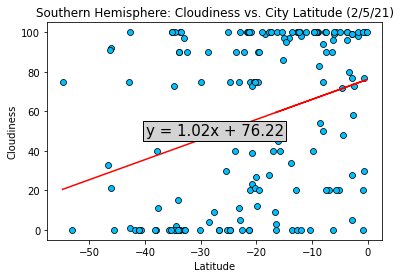

In [21]:
# Values and Initial Plot
x_values = southern["Latitude"]
y_values = southern["Cloudiness"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Southern Hemisphere: Cloudiness vs. City Latitude ({today_date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Value: 0.06848488073677832


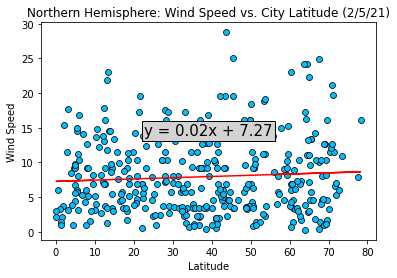

In [22]:
# Values and Initial Plot
x_values = northern["Latitude"]
y_values = northern["Wind Speed"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Northern Hemisphere: Wind Speed vs. City Latitude ({today_date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")

##### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Value: -0.28061931834050424


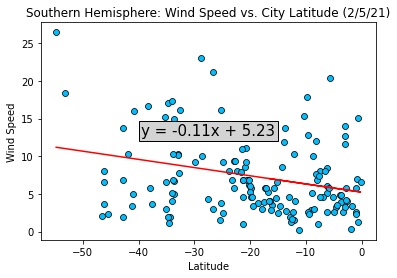

In [23]:
# Values and Initial Plot
x_values = southern["Latitude"]
y_values = southern["Wind Speed"]
plt.scatter(x_values,y_values,c="deepskyblue",edgecolors="black",linewidths=.75)

# Labelling and Formatting
plt.title(f"Southern Hemisphere: Wind Speed vs. City Latitude ({today_date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Regression Stuff
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values,y_values)
regression_line = slope * x_values + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
x_pos = (min(x_values)+max(x_values)) / 2
y_pos = (min(y_values)+max(y_values)) / 2
plt.plot(x_values, regression_line, "-", color='red')
# Comment out the below line to see all data points.
plt.annotate(equation,(x_pos,y_pos), fontsize=15, ha="center",va="center",
             bbox=dict(boxstyle="square,pad=0.15", fc="lightgray", lw=1))
    
plt.tight_layout
print(f"R Value: {rvalue}")